In [1]:
import zipfile

# specify the zip file name
file_name = "/content/archive (1).zip"

# Open the zip file in read mode
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    # Extract all the contents of the zip file in current directory
    zip_ref.extractall()

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

# Display the first few rows of the dataframe
print(df.head())

# Checking the info of the DataFrame
df.info()


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age               

In [5]:
# one-hot encoding for gender and smoking_history
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


0    91500
1     8500
Name: diabetes, dtype: int64


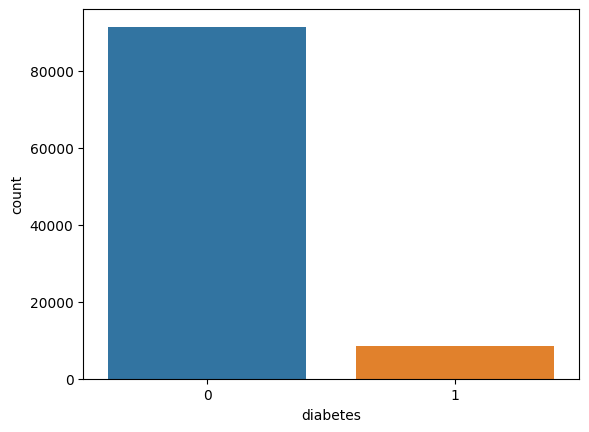

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the balance of the target variable
print(df['diabetes'].value_counts())

# Plot the balance
sns.countplot(x='diabetes', data=df)
plt.show()

# Checking missing values
print(df.isnull().sum())

In [6]:
# one-hot encoding for gender and smoking_history
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

In [7]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit and transform the data
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [8]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,0,1,-0.321056,1.001706,0.047704,0,1,0,0,0,0,0,0,1,0
1,0.538006,0,0,-0.000116,1.001706,-1.426210,0,1,0,0,1,0,0,0,0,0
2,-0.616691,0,0,-0.000116,0.161108,0.489878,0,0,1,0,0,0,0,0,1,0
3,-0.261399,0,0,-0.583232,-0.492690,0.416183,0,1,0,0,0,1,0,0,0,0
4,1.515058,1,1,-1.081970,-0.679490,0.416183,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.692704,0,0,-0.000116,0.628107,-1.180558,0,1,0,0,1,0,0,0,0,0
99996,-1.771388,0,0,-1.499343,0.908306,-0.934905,0,1,0,0,1,0,0,0,0,0
99997,1.070944,0,0,0.076729,0.161108,0.416183,0,0,1,0,0,0,0,1,0,0
99998,-0.794336,0,0,1.220361,-1.426688,-0.934905,0,1,0,0,0,0,0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Check the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", conf_matrix)

Accuracy:  0.95905
Confusion Matrix:  [[18127   165]
 [  654  1054]]


In [10]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Check the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", conf_matrix)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy:  0.97155
Confusion Matrix:  [[18243    49]
 [  520  1188]]


In [12]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM model
model = svm.SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Check the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", conf_matrix)


Accuracy:  0.9645
Confusion Matrix:  [[18282    10]
 [  700  1008]]
